In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.plotting import scatter_matrix

from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

from scipy import stats

import joblib

import warnings
warnings.filterwarnings('ignore')

In [2]:
df = pd.read_csv('car_price_prediction.csv')

In [3]:
df.shape

(19237, 18)

In [4]:
df.head()

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [6]:
df.isnull().sum()

ID                  0
Price               0
Levy                0
Manufacturer        0
Model               0
Prod. year          0
Category            0
Leather interior    0
Fuel type           0
Engine volume       0
Mileage             0
Cylinders           0
Gear box type       0
Drive wheels        0
Doors               0
Wheel               0
Color               0
Airbags             0
dtype: int64

 The data we imported has 19237 rows and 18 columns. Seems like we don't have any null value from info() method but actually in Levy column the null values entered as '-' so we had to change them to null values. We will handle this problem soon.

In [7]:
desc = ['Price','Levy','Mileage' ,'Prod. year', 'Cylinders', 'Airbags']
df[desc].describe()

,Price,Prod. year,Cylinders,Airbags
count,1.923700e+04,19237.000000,19237.000000,19237.000000
mean,1.855593e+04,2010.912824,4.582991,6.582627
std,1.905813e+05,5.668673,1.199933,4.320168
min,1.000000e+00,1939.000000,1.000000,0.000000
25%,5.331000e+03,2009.000000,4.000000,4.000000
50%,1.317200e+04,2012.000000,4.000000,6.000000
75%,2.207500e+04,2015.000000,4.000000,12.000000
max,2.630750e+07,2020.000000,16.000000,16.000000


# Explotory Data Analysis and Data Cleaning 

Let's start checking the unique values for each attributes

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19237 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   ID                19237 non-null  int64  
 1   Price             19237 non-null  int64  
 2   Levy              19237 non-null  object 
 3   Manufacturer      19237 non-null  object 
 4   Model             19237 non-null  object 
 5   Prod. year        19237 non-null  int64  
 6   Category          19237 non-null  object 
 7   Leather interior  19237 non-null  object 
 8   Fuel type         19237 non-null  object 
 9   Engine volume     19237 non-null  object 
 10  Mileage           19237 non-null  object 
 11  Cylinders         19237 non-null  float64
 12  Gear box type     19237 non-null  object 
 13  Drive wheels      19237 non-null  object 
 14  Doors             19237 non-null  object 
 15  Wheel             19237 non-null  object 
 16  Color             19237 non-null  object

In [9]:
df.columns[5]

'Prod. year'

In [10]:
for i in df.columns:
    print(i)

ID
Price
Levy
Manufacturer
Model
Prod. year
Category
Leather interior
Fuel type
Engine volume
Mileage
Cylinders
Gear box type
Drive wheels
Doors
Wheel
Color
Airbags


In [11]:
type(df.Levy[1])

str

In [12]:
for col in df.columns:
    print(col)
    print(df[col].unique())
    print('*'*75)

ID
[45654403 44731507 45774419 ... 45804997 45793526 45813273]
***************************************************************************
Price
[13328 16621  8467 ... 56814 63886 22075]
***************************************************************************
Levy
['1399' '1018' '-' '862' '446' '891' '761' '751' '394' '1053' '1055'
 '1079' '810' '2386' '1850' '531' '586' '1249' '2455' '583' '1537' '1288'
 '915' '1750' '707' '1077' '1486' '1091' '650' '382' '1436' '1194' '503'
 '1017' '1104' '639' '629' '919' '781' '530' '640' '765' '777' '779' '934'
 '769' '645' '1185' '1324' '830' '1187' '1111' '760' '642' '1604' '1095'
 '966' '473' '1138' '1811' '988' '917' '1156' '687' '11714' '836' '1347'
 '2866' '1646' '259' '609' '697' '585' '475' '690' '308' '1823' '1361'
 '1273' '924' '584' '2078' '831' '1172' '893' '1872' '1885' '1266' '447'
 '2148' '1730' '730' '289' '502' '333' '1325' '247' '879' '1342' '1327'
 '1598' '1514' '1058' '738' '1935' '481' '1522' '1282' '456' '880' '900'
 '798'

In [13]:
df[df['Levy'] == '-']

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
2,45774419,8467,-,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
9,45756839,26657,-,LEXUS,RX 350,2007,Jeep,Yes,Petrol,3.5,128500 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
11,45814819,8781,-,FORD,Transit,1999,Microbus,No,CNG,4,0 km,8.0,Manual,Rear,02-Mar,Left wheel,Blue,0
12,45815568,3000,-,OPEL,Vectra,1997,Goods wagon,No,CNG,1.6,350000 km,4.0,Manual,Front,04-May,Left wheel,White,4
23,45814106,7840,-,FORD,Transit,2001,Microbus,No,Diesel,2.0 Turbo,230000 km,4.0,Manual,Front,02-Mar,Left wheel,White,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19223,44571028,8781,-,DODGE,Caliber,2008,Hatchback,No,Petrol,2.4,0 km,4.0,Automatic,Front,04-May,Left wheel,Blue,4
19224,45768089,19130,-,KIA,Optima ex,2014,Sedan,Yes,Petrol,2.4,35800 km,4.0,Automatic,Front,04-May,Left wheel,Black,12
19226,45796788,7840,-,NISSAN,Skyline,2003,Sedan,Yes,Petrol,3,220000 km,6.0,Tiptronic,Rear,04-May,Right-hand drive,White,0
19229,39977395,50,-,TOYOTA,Prius,2008,Hatchback,No,Hybrid,1.5,150000 km,4.0,Automatic,Front,04-May,Left wheel,Silver,6


As I mentioned earlier we had the '-' values in the Levy column which used instead of null values. We have 5819 of them! We will replace them with null for now and will handle what to imput there later on.

In [14]:
df1=df.copy()

In [15]:
df1.Levy=df1.Levy.replace('-',np.nan)

In [16]:
df1.head() 

,ID,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags
0,45654403,13328,1399,LEXUS,RX 450,2010,Jeep,Yes,Hybrid,3.5,186005 km,6.0,Automatic,4x4,04-May,Left wheel,Silver,12
1,44731507,16621,1018,CHEVROLET,Equinox,2011,Jeep,No,Petrol,3,192000 km,6.0,Tiptronic,4x4,04-May,Left wheel,Black,8
2,45774419,8467,NaN,HONDA,FIT,2006,Hatchback,No,Petrol,1.3,200000 km,4.0,Variator,Front,04-May,Right-hand drive,Black,2
3,45769185,3607,862,FORD,Escape,2011,Jeep,Yes,Hybrid,2.5,168966 km,4.0,Automatic,4x4,04-May,Left wheel,White,0
4,45809263,11726,446,HONDA,FIT,2014,Hatchback,Yes,Petrol,1.3,91901 km,4.0,Automatic,Front,04-May,Left wheel,Silver,4


In [17]:
# Replacing '-' with null
df['Levy'].replace({'-':np.nan}, inplace = True)

In [18]:
# Converting Levy type to float
df['Levy'] = df['Levy'].astype('float64')

In [19]:
x=['3',2,True]

In [20]:
x=pd.DataFrame(x)
x

,0
0,3
1,2
2,True


In [21]:
type(x)

pandas.core.frame.DataFrame

In [22]:
x.astype('float64')

,0
0,3.0
1,2.0
2,1.0


In [23]:
x[0]

0       3
1       2
2    True
Name: 0, dtype: object

In [24]:
x[0].replace({'3': 45, 2:False})

0       45
1    False
2     True
Name: 0, dtype: object

In [25]:
# Replacement: Yes >> True , No >> False
df['Leather interior'].replace({'Yes': True, 'No':False}, inplace=True)

In [26]:
df['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 Turbo', '2.2 Turbo', '4.7', '1.5', '4.4', '3.0 Turbo',
       '1.4 Turbo', '3.6', '2.3', '1.5 Turbo', '1.6 Turbo', '2.2',
       '2.3 Turbo', '1.4', '5.5', '2.8 Turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 Turbo', '2.4 Turbo', '3.5 Turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 Turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 Turbo', '3.7', '1', '2.5 Turbo', '2.6',
       '1.9 Turbo', '4.4 Turbo', '4.7 Turbo', '0.8', '0.2 Turbo', '5.7',
       '4.8 Turbo', '4.6 Turbo', '6.7', '6.2', '1.2 Turbo', '3.4',
       '1.7 Turbo', '6.3 Turbo', '2.7 Turbo', '4.3', '4.2', '2.9 Turbo',
       '0', '4.0 Turbo', '20', '3.6 Turbo', '0.3', '3.7 Turbo', '5.9',
       '5.5 Turbo', '0.2', '2.1 Turbo', '5.6', '6', '0.7 Turbo',
       '0.6 Turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 Turbo', '6.3',
       '4.5 Turbo', '0.8 Turbo', '4.2 Turbo', '3.1', '5.0 Turbo', '6.4',
       '3

We want to convert the Engine column type to float in order to do that we need to strip the 'turbo' word in them. Also, we will make new column which is Turbo , will indicate that if the car has turbo or not (True and False).

In [27]:
# Making sure that we don miss anything so making everything lower first
df['Engine volume'] = df['Engine volume'].str.lower()

In [28]:
df['Engine volume'].unique()

array(['3.5', '3', '1.3', '2.5', '2', '1.8', '2.4', '4', '1.6', '3.3',
       '2.0 turbo', '2.2 turbo', '4.7', '1.5', '4.4', '3.0 turbo',
       '1.4 turbo', '3.6', '2.3', '1.5 turbo', '1.6 turbo', '2.2',
       '2.3 turbo', '1.4', '5.5', '2.8 turbo', '3.2', '3.8', '4.6', '1.2',
       '5', '1.7', '2.9', '0.5', '1.8 turbo', '2.4 turbo', '3.5 turbo',
       '1.9', '2.7', '4.8', '5.3', '0.4', '2.8', '3.2 turbo', '1.1',
       '2.1', '0.7', '5.4', '1.3 turbo', '3.7', '1', '2.5 turbo', '2.6',
       '1.9 turbo', '4.4 turbo', '4.7 turbo', '0.8', '0.2 turbo', '5.7',
       '4.8 turbo', '4.6 turbo', '6.7', '6.2', '1.2 turbo', '3.4',
       '1.7 turbo', '6.3 turbo', '2.7 turbo', '4.3', '4.2', '2.9 turbo',
       '0', '4.0 turbo', '20', '3.6 turbo', '0.3', '3.7 turbo', '5.9',
       '5.5 turbo', '0.2', '2.1 turbo', '5.6', '6', '0.7 turbo',
       '0.6 turbo', '6.8', '4.5', '0.6', '7.3', '0.1', '1.0 turbo', '6.3',
       '4.5 turbo', '0.8 turbo', '4.2 turbo', '3.1', '5.0 turbo', '6.4',
       '3

In [29]:
df['Engine volume'].str.contains('turbo')

0        False
1        False
2        False
3        False
4        False
         ...  
19232     True
19233    False
19234    False
19235    False
19236    False
Name: Engine volume, Length: 19237, dtype: bool

In [30]:
# Finding the rows which has turbo in them and assigning the results to new column Turbo. 
df['Turbo'] = df['Engine volume'].str.contains('turbo')

In [31]:
df['Engine volume']

0              3.5
1                3
2              1.3
3              2.5
4              1.3
           ...    
19232    2.0 turbo
19233          2.4
19234            2
19235            2
19236          2.4
Name: Engine volume, Length: 19237, dtype: object

In [32]:
df['Engine volume'].str.slice(0,3)

0        3.5
1          3
2        1.3
3        2.5
4        1.3
        ... 
19232    2.0
19233    2.4
19234      2
19235      2
19236    2.4
Name: Engine volume, Length: 19237, dtype: object

In [33]:
# Slicing engine volumes and converting type to float
df['Engine volume'] = df['Engine volume'].str.slice(0,3)

In [34]:
df['Engine volume'] = df['Engine volume'].astype('float64')

In [35]:
df['Mileage']

0        186005 km
1        192000 km
2        200000 km
3        168966 km
4         91901 km
           ...    
19232    300000 km
19233    161600 km
19234    116365 km
19235     51258 km
19236    186923 km
Name: Mileage, Length: 19237, dtype: object

In [36]:
df['Mileage'] = df['Mileage'].str.strip('km')
df['Mileage']

0        186005 
1        192000 
2        200000 
3        168966 
4         91901 
          ...   
19232    300000 
19233    161600 
19234    116365 
19235     51258 
19236    186923 
Name: Mileage, Length: 19237, dtype: object

In [37]:
df['Mileage'] = df['Mileage'].astype('int64')

In [38]:
df['Doors'].unique()

array(['04-May', '02-Mar', '>5'], dtype=object)

In [39]:
df['Doors'].replace({'04-May':4, '02-Mar':2, '>5':5}, inplace=True)

In [40]:
cars = df.drop('ID', axis=1)

In [41]:
cars.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,True,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,False
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,False,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,False
2,8467,NaN,HONDA,FIT,2006,Hatchback,False,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,False
3,3607,862.0,FORD,Escape,2011,Jeep,True,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,False
4,11726,446.0,HONDA,FIT,2014,Hatchback,True,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,False


In [42]:
cars[cars.Price == cars.Price.max()]

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
16983,26307500,NaN,OPEL,Combo,1999,Goods wagon,False,Diesel,1.7,99999,4.0,Manual,Front,2,Left wheel,Blue,0,False


In [43]:
display(cars[cars.Price == cars.Price.max()])
display(cars[cars.Price < 1000])

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
16983,26307500,NaN,OPEL,Combo,1999,Goods wagon,False,Diesel,1.7,99999,4.0,Manual,Front,2,Left wheel,Blue,0,False


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
7,549,751.0,HYUNDAI,Sonata,2013,Sedan,True,Petrol,2.4,216118,4.0,Automatic,Front,4,Left wheel,Grey,12,False
10,941,1053.0,MERCEDES-BENZ,E 350,2014,Sedan,True,Diesel,3.5,184467,6.0,Automatic,Rear,4,Left wheel,White,12,False
15,549,1079.0,TOYOTA,CHR,2018,Jeep,True,Petrol,2.0,74146,4.0,Automatic,Front,4,Left wheel,White,12,False
18,549,2386.0,HYUNDAI,Sonata,2006,Sedan,True,Petrol,3.3,295059,6.0,Automatic,Rear,4,Left wheel,Blue,12,False
19,941,1850.0,LEXUS,RX 400,2008,Jeep,True,Hybrid,3.5,364523,6.0,Automatic,4x4,4,Left wheel,Black,12,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19218,30,NaN,NISSAN,Note,2006,Hatchback,False,Petrol,1.3,0,4.0,Automatic,Front,4,Right-hand drive,Green,9,False
19228,706,1850.0,MERCEDES-BENZ,E 350,2008,Sedan,True,Diesel,3.5,122874,6.0,Automatic,Rear,4,Left wheel,Black,12,False
19229,50,NaN,TOYOTA,Prius,2008,Hatchback,False,Hybrid,1.5,150000,4.0,Automatic,Front,4,Left wheel,Silver,6,False
19230,470,645.0,TOYOTA,Prius,2011,Hatchback,True,Hybrid,1.8,307325,4.0,Automatic,Front,4,Left wheel,Silver,12,False


In [44]:
display(cars[cars.Mileage == cars.Mileage.max()])
display(cars[cars.Mileage < 1000])

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
2278,6899,NaN,VOLKSWAGEN,Golf,1999,Sedan,False,Petrol,1.6,2147483647,4.0,Manual,Front,4,Left wheel,Black,4,False
6157,5959,NaN,MERCEDES-BENZ,C 180,1995,Sedan,False,CNG,1.8,2147483647,4.0,Manual,Rear,4,Left wheel,Blue,5,False
11901,10036,NaN,SUBARU,Forester,2005,Jeep,False,Petrol,2.0,2147483647,4.0,Tiptronic,4x4,4,Right-hand drive,White,12,False
12734,2200,NaN,UAZ,31514,1968,Jeep,True,CNG,2.4,2147483647,4.0,Manual,4x4,4,Left wheel,Black,10,False
15347,3,NaN,BMW,525,1995,Sedan,False,Petrol,2.8,2147483647,6.0,Manual,Rear,4,Left wheel,Black,3,False
15393,15681,NaN,TOYOTA,Prius,2008,Sedan,False,Petrol,2.0,2147483647,4.0,Automatic,Front,4,Left wheel,Blue,0,False
19167,18817,1995.0,FORD,Transit,2003,Microbus,False,Diesel,2.4,2147483647,4.0,Manual,Front,2,Left wheel,White,2,True


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
11,8781,NaN,FORD,Transit,1999,Microbus,False,CNG,4.0,0,8.0,Manual,Rear,2,Left wheel,Blue,0,False
24,4704,NaN,OPEL,Vectra,1995,Sedan,False,Petrol,1.8,0,4.0,Automatic,Front,4,Left wheel,Green,4,False
26,549,2455.0,LEXUS,GX 470,2008,Jeep,True,Petrol,4.7,0,8.0,Automatic,4x4,4,Left wheel,White,0,False
83,8154,NaN,HONDA,Cr-v,1998,Jeep,False,Petrol,2.0,0,4.0,Automatic,4x4,4,Right-hand drive,White,2,False
97,4234,NaN,HONDA,Civic,1997,Hatchback,True,Petrol,1.4,0,4.0,Manual,Front,2,Left wheel,Blue,6,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19064,2900,NaN,BMW,320,1994,Sedan,True,Petrol,2.0,0,6.0,Manual,Rear,4,Left wheel,Green,2,False
19088,2200,NaN,PEUGEOT,406,2001,Sedan,False,Petrol,2.0,0,4.0,Manual,Front,4,Left wheel,White,2,False
19103,30,NaN,NISSAN,Tiida,2006,Hatchback,False,Petrol,1.5,0,4.0,Automatic,Front,4,Right-hand drive,Black,4,False
19218,30,NaN,NISSAN,Note,2006,Hatchback,False,Petrol,1.3,0,4.0,Automatic,Front,4,Right-hand drive,Green,9,False


As a outlier detection algorithm, we will use IQR calculation and get rid of the values which is higher or lower than 1.5 IQR.

In [45]:
def detect_outliers(df,features,thold):
    outlier_indices = []
    
    for c in features:
        # 1st quartile
        Q1 = np.percentile(df[c],25)
        # 3rd quartile
        Q3 = np.percentile(df[c],75)
        # IQR
        IQR = Q3 - Q1
        # Outlier step
        outlier_step = IQR * thold
        # Detect outlier and their indeces
        outlier_list_col = df[(df[c] < Q1 - outlier_step) | (df[c] > Q3 + outlier_step)].index
        # Store indeces
        outlier_indices.extend(outlier_list_col)
    
    
    return outlier_indices

In [46]:
features = ['Price', 'Levy', 'Mileage']
outliers = detect_outliers(cars,features, 1.5)

In [47]:
outliers

[14,
 36,
 47,
 56,
 73,
 90,
 111,
 127,
 159,
 189,
 211,
 232,
 249,
 261,
 262,
 263,
 278,
 283,
 316,
 370,
 420,
 424,
 437,
 445,
 450,
 451,
 455,
 483,
 573,
 579,
 580,
 581,
 604,
 618,
 633,
 650,
 687,
 711,
 723,
 724,
 732,
 740,
 747,
 839,
 843,
 849,
 855,
 857,
 874,
 902,
 906,
 907,
 929,
 977,
 1019,
 1027,
 1083,
 1090,
 1106,
 1128,
 1132,
 1143,
 1145,
 1162,
 1171,
 1179,
 1218,
 1222,
 1225,
 1261,
 1265,
 1272,
 1278,
 1297,
 1299,
 1316,
 1325,
 1342,
 1364,
 1383,
 1401,
 1428,
 1448,
 1459,
 1478,
 1487,
 1490,
 1509,
 1510,
 1537,
 1539,
 1557,
 1562,
 1573,
 1582,
 1609,
 1612,
 1626,
 1657,
 1662,
 1672,
 1673,
 1704,
 1726,
 1737,
 1740,
 1766,
 1781,
 1803,
 1805,
 1820,
 1823,
 1832,
 1916,
 1956,
 1970,
 1993,
 2010,
 2037,
 2054,
 2055,
 2058,
 2071,
 2085,
 2109,
 2182,
 2184,
 2192,
 2283,
 2325,
 2330,
 2353,
 2365,
 2366,
 2372,
 2373,
 2411,
 2416,
 2437,
 2438,
 2504,
 2534,
 2535,
 2550,
 2560,
 2569,
 2604,
 2615,
 2618,
 2675,
 2676,
 26

In [48]:
deleted_df = cars.drop(cars.loc[outliers].index,axis=0)

In [49]:
df.shape

(19237, 19)

In [50]:
deleted_df.shape

(17527, 18)

In [51]:
deleted_df['Manufacturer'].value_counts().sort_values(ascending = False)[:10]

TOYOTA           3392
HYUNDAI          3199
MERCEDES-BENZ    1840
CHEVROLET        1042
FORD             1032
BMW               943
HONDA             909
LEXUS             837
NISSAN            653
VOLKSWAGEN        572
Name: Manufacturer, dtype: int64

In [52]:
top10_cars = deleted_df['Manufacturer'].value_counts().sort_values(ascending = False)[:10]

In [53]:
top10_cars

TOYOTA           3392
HYUNDAI          3199
MERCEDES-BENZ    1840
CHEVROLET        1042
FORD             1032
BMW               943
HONDA             909
LEXUS             837
NISSAN            653
VOLKSWAGEN        572
Name: Manufacturer, dtype: int64

In [54]:
top10_cars.shape

(10,)

In [55]:
type(top10_cars)

pandas.core.series.Series

In [56]:
top10_cars.index

Index(['TOYOTA', 'HYUNDAI', 'MERCEDES-BENZ', 'CHEVROLET', 'FORD', 'BMW',
       'HONDA', 'LEXUS', 'NISSAN', 'VOLKSWAGEN'],
      dtype='object')

In [57]:
for i in list(top10_cars.index) :
       display(deleted_df[deleted_df.Manufacturer==i])
        

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
6,1803,761.0,TOYOTA,Prius,2010,Hatchback,True,Hybrid,1.8,258909,4.0,Automatic,Front,4,Left wheel,White,12,False
15,549,1079.0,TOYOTA,CHR,2018,Jeep,True,Petrol,2.0,74146,4.0,Automatic,Front,4,Left wheel,White,12,False
21,20698,586.0,TOYOTA,Prius,2012,Sedan,True,Plug-in Hybrid,1.8,187000,4.0,Automatic,Front,4,Left wheel,White,12,False
22,17562,1249.0,TOYOTA,Camry,2017,Sedan,True,Petrol,2.5,39709,4.0,Automatic,Front,4,Left wheel,Black,12,False
27,30,NaN,TOYOTA,Prius,2008,Sedan,False,Hybrid,1.5,169000,4.0,Automatic,Front,4,Left wheel,White,8,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19214,1176,986.0,TOYOTA,Camry,2010,Sedan,True,Hybrid,2.4,129170,4.0,Automatic,Front,4,Left wheel,Black,12,False
19216,37633,1249.0,TOYOTA,RAV 4,2017,Jeep,True,Petrol,2.5,23430,4.0,Tiptronic,Front,4,Left wheel,Beige,12,False
19219,19444,NaN,TOYOTA,Prius,2013,Sedan,False,Hybrid,1.8,140607,4.0,Automatic,Front,4,Left wheel,Grey,12,False
19229,50,NaN,TOYOTA,Prius,2008,Hatchback,False,Hybrid,1.5,150000,4.0,Automatic,Front,4,Left wheel,Silver,6,False


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
5,39493,891.0,HYUNDAI,Santa FE,2016,Jeep,True,Diesel,2.0,160931,4.0,Automatic,Front,4,Left wheel,White,4,False
7,549,751.0,HYUNDAI,Sonata,2013,Sedan,True,Petrol,2.4,216118,4.0,Automatic,Front,4,Left wheel,Grey,12,False
16,7683,810.0,HYUNDAI,Elantra,2016,Sedan,True,Petrol,1.8,121840,4.0,Automatic,Front,4,Left wheel,Blue,12,False
17,28382,810.0,HYUNDAI,Elantra,2016,Sedan,True,Petrol,1.8,54317,4.0,Automatic,Front,4,Left wheel,White,4,False
18,549,2386.0,HYUNDAI,Sonata,2006,Sedan,True,Petrol,3.3,295059,6.0,Automatic,Rear,4,Left wheel,Blue,12,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19210,8311,642.0,HYUNDAI,Sonata,2012,Sedan,True,LPG,2.0,36545,4.0,Automatic,Front,4,Left wheel,White,4,False
19215,470,831.0,HYUNDAI,Elantra,2017,Sedan,True,Petrol,1.6,25635,4.0,Automatic,Front,4,Left wheel,Black,12,False
19233,15681,831.0,HYUNDAI,Sonata,2011,Sedan,True,Petrol,2.4,161600,4.0,Tiptronic,Front,4,Left wheel,Red,8,False
19234,26108,836.0,HYUNDAI,Tucson,2010,Jeep,True,Diesel,2.0,116365,4.0,Automatic,Front,4,Left wheel,Grey,4,False


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
10,941,1053.0,MERCEDES-BENZ,E 350,2014,Sedan,True,Diesel,3.5,184467,6.0,Automatic,Rear,4,Left wheel,White,12,False
25,20385,NaN,MERCEDES-BENZ,E 220,2006,Sedan,True,Diesel,2.2,210000,4.0,Tiptronic,Rear,4,Left wheel,Black,8,True
30,15681,1288.0,MERCEDES-BENZ,Vito,2007,Goods wagon,False,Diesel,2.0,180000,6.0,Manual,Rear,4,Left wheel,White,4,True
53,392,1017.0,MERCEDES-BENZ,E 300,2017,Sedan,True,Petrol,2.0,1600,4.0,Automatic,Rear,4,Left wheel,Black,12,False
55,8781,NaN,MERCEDES-BENZ,C 180,2001,Coupe,False,Petrol,2.0,260000,4.0,Manual,Rear,2,Left wheel,Blue,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19200,36065,640.0,MERCEDES-BENZ,CLA 250 AMG,2013,Sedan,True,Petrol,2.0,68000,4.0,Tiptronic,Front,4,Left wheel,Red,12,True
19227,29793,1053.0,MERCEDES-BENZ,E 350,2014,Sedan,True,Diesel,3.5,219030,6.0,Automatic,4x4,4,Left wheel,Black,12,False
19228,706,1850.0,MERCEDES-BENZ,E 350,2008,Sedan,True,Diesel,3.5,122874,6.0,Automatic,Rear,4,Left wheel,Black,12,False
19231,5802,1055.0,MERCEDES-BENZ,E 350,2013,Sedan,True,Diesel,3.5,107800,6.0,Automatic,Rear,4,Left wheel,Grey,12,False


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,False,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,False
59,23521,781.0,CHEVROLET,Cruze LT,2018,Sedan,False,Petrol,1.4,22000,4.0,Automatic,Front,4,Left wheel,Red,6,True
71,15800,769.0,CHEVROLET,Captiva,2011,Jeep,True,Diesel,2.2,255456,4.0,Automatic,Front,4,Left wheel,Silver,4,False
88,6247,760.0,CHEVROLET,Cruze,2010,Sedan,True,Petrol,1.8,40772,4.0,Automatic,Front,4,Left wheel,Black,4,False
89,16289,642.0,CHEVROLET,Orlando,2012,Jeep,True,Diesel,2.0,172000,4.0,Automatic,Front,4,Left wheel,Grey,4,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19137,15125,642.0,CHEVROLET,Orlando,2012,Jeep,True,Diesel,2.0,156834,4.0,Automatic,Front,4,Left wheel,Golden,4,False
19138,15681,738.0,CHEVROLET,Cruze,2017,Sedan,True,Petrol,1.4,107637,4.0,Automatic,Front,4,Left wheel,Black,0,False
19146,15423,531.0,CHEVROLET,Cruze,2012,Sedan,True,Petrol,1.6,130412,4.0,Automatic,Front,4,Left wheel,Black,4,False
19186,470,1901.0,CHEVROLET,Malibu,2008,Sedan,True,Petrol,3.6,260349,6.0,Automatic,Front,4,Left wheel,Black,12,False


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
3,3607,862.0,FORD,Escape,2011,Jeep,True,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,False
11,8781,NaN,FORD,Transit,1999,Microbus,False,CNG,4.0,0,8.0,Manual,Rear,2,Left wheel,Blue,0,False
23,7840,NaN,FORD,Transit,2001,Microbus,False,Diesel,2.0,230000,4.0,Manual,Front,2,Left wheel,White,0,True
49,17249,NaN,FORD,Escape Hybrid,2008,Jeep,False,Hybrid,2.3,147000,4.0,Variator,4x4,4,Left wheel,White,8,False
60,16935,530.0,FORD,Fusion,2013,Sedan,False,Petrol,1.6,83000,4.0,Tiptronic,Front,4,Left wheel,Silver,8,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19059,10500,NaN,FORD,Transit,1997,Goods wagon,False,Diesel,2.5,11111,4.0,Manual,Rear,4,Left wheel,White,4,True
19074,40424,1493.0,FORD,Explorer,2016,Minivan,True,Petrol,3.5,97000,4.0,Automatic,Front,4,Left wheel,Grey,4,False
19094,11290,NaN,FORD,Transit,2000,Goods wagon,False,Diesel,2.5,270000,4.0,Manual,Rear,5,Left wheel,Orange,1,True
19153,9722,NaN,FORD,Escape,2005,Jeep,False,Petrol,3.0,170000,6.0,Automatic,4x4,4,Left wheel,Green,6,False


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
32,6899,NaN,BMW,X5,2000,Jeep,True,CNG,4.4,200000,8.0,Automatic,4x4,4,Left wheel,Silver,6,False
58,392,919.0,BMW,535,2012,Sedan,True,Petrol,3.0,204318,6.0,Automatic,Rear,4,Left wheel,Black,12,False
91,2822,NaN,BMW,520 Vanos,1995,Sedan,True,Petrol,2.0,350000,6.0,Manual,Rear,4,Left wheel,Blue,2,False
95,32929,NaN,BMW,428 Sport Line,2013,Coupe,True,Petrol,2.0,160000,4.0,Automatic,Rear,2,Left wheel,Black,12,True
107,1019,917.0,BMW,X5,2013,Jeep,True,Diesel,3.0,137802,6.0,Automatic,4x4,4,Left wheel,Black,12,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19173,8781,NaN,BMW,525,1998,Sedan,True,Petrol,2.5,178000,6.0,Manual,Rear,4,Left wheel,Beige,5,False
19181,3607,1104.0,BMW,X5,2015,Jeep,True,Diesel,3.0,201056,6.0,Automatic,4x4,4,Left wheel,Black,0,False
19185,25402,640.0,BMW,328,2013,Sedan,True,Petrol,2.0,150000,4.0,Tiptronic,4x4,4,Left wheel,Black,12,False
19187,7213,NaN,BMW,525,1998,Sedan,False,CNG,2.5,212000,6.0,Manual,Rear,4,Left wheel,Silver,6,False


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
2,8467,NaN,HONDA,FIT,2006,Hatchback,False,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,False
4,11726,446.0,HONDA,FIT,2014,Hatchback,True,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,False
37,7527,1486.0,HONDA,FIT,2010,Hatchback,False,Hybrid,1.3,158000,4.0,Automatic,Front,4,Right-hand drive,Black,4,False
50,34889,891.0,HONDA,Civic,2016,Sedan,True,Petrol,2.0,87768,4.0,Automatic,Front,4,Left wheel,Blue,4,False
82,21953,1187.0,HONDA,Civic,2014,Sedan,False,Hybrid,1.4,16000,8.0,Automatic,4x4,4,Right-hand drive,White,10,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19148,30,NaN,HONDA,FIT,2005,Hatchback,False,Petrol,1.3,169000,4.0,Automatic,Front,4,Right-hand drive,White,4,False
19155,24000,2266.0,HONDA,Fred,2018,Minivan,False,Hybrid,1.5,19000,4.0,Automatic,Front,4,Right-hand drive,Grey,0,False
19162,7840,NaN,HONDA,Odyssey,2005,Minivan,False,Petrol,2.4,200000,4.0,Tiptronic,Front,4,Right-hand drive,Silver,6,False
19177,706,503.0,HONDA,FIT,2012,Jeep,True,Petrol,1.5,277856,4.0,Automatic,Front,4,Left wheel,White,0,False


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,True,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,False
9,26657,NaN,LEXUS,RX 350,2007,Jeep,True,Petrol,3.5,128500,6.0,Automatic,4x4,4,Left wheel,Silver,12,False
13,1019,1055.0,LEXUS,RX 450,2013,Jeep,True,Hybrid,3.5,138038,6.0,Automatic,Front,4,Left wheel,White,12,False
19,941,1850.0,LEXUS,RX 400,2008,Jeep,True,Hybrid,3.5,364523,6.0,Automatic,4x4,4,Left wheel,Black,12,False
26,549,2455.0,LEXUS,GX 470,2008,Jeep,True,Petrol,4.7,0,8.0,Automatic,4x4,4,Left wheel,White,0,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19135,22580,NaN,LEXUS,IS 250,2010,Sedan,True,Petrol,2.5,201600,6.0,Tiptronic,Rear,4,Left wheel,Black,8,False
19145,18503,1750.0,LEXUS,RX 400,2008,Jeep,True,Hybrid,3.3,100000,6.0,Tiptronic,4x4,4,Left wheel,Beige,12,False
19191,11290,690.0,LEXUS,RX 450,2016,Jeep,True,Hybrid,3.5,59858,6.0,Automatic,Front,4,Left wheel,Silver,12,False
19201,549,986.0,LEXUS,HS 250h,2010,Sedan,True,Hybrid,2.4,180234,4.0,Automatic,Front,4,Left wheel,White,0,False


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
57,1411,629.0,NISSAN,Juke,2015,Jeep,True,Petrol,1.6,87112,4.0,Automatic,4x4,4,Left wheel,Black,0,False
62,7213,530.0,NISSAN,Juke,2013,Jeep,True,Petrol,1.6,312118,4.0,Automatic,Front,4,Left wheel,Black,0,False
96,18817,NaN,NISSAN,Patrol,1990,Jeep,False,Diesel,2.8,333333,4.0,Manual,Rear,4,Left wheel,Black,0,True
131,17876,NaN,NISSAN,Serena,2012,Minivan,False,Petrol,2.0,143000,4.0,Tiptronic,Front,4,Right-hand drive,White,12,False
132,549,2866.0,NISSAN,Maxima,2004,Sedan,True,Petrol,3.5,299709,6.0,Automatic,Front,4,Left wheel,Grey,12,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19123,12231,NaN,NISSAN,X-Trail,2004,Jeep,True,Petrol,2.0,219000,4.0,Automatic,4x4,4,Right-hand drive,Black,4,False
19142,2600,NaN,NISSAN,Maxima,1997,Sedan,False,CNG,3.0,2150,6.0,Manual,Front,4,Left wheel,White,4,False
19149,5645,NaN,NISSAN,Teana,2003,Sedan,False,Petrol,2.3,201000,6.0,Automatic,Front,4,Right-hand drive,White,6,False
19218,30,NaN,NISSAN,Note,2006,Hatchback,False,Petrol,1.3,0,4.0,Automatic,Front,4,Right-hand drive,Green,9,False


,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
42,20165,650.0,VOLKSWAGEN,Jetta,2016,Sedan,True,Petrol,1.4,11200,4.0,Tiptronic,Front,4,Left wheel,Black,8,True
148,1568,639.0,VOLKSWAGEN,Jetta,2014,Sedan,True,Diesel,2.0,82392,4.0,Automatic,Front,4,Left wheel,Silver,12,False
168,36110,924.0,VOLKSWAGEN,Passat,2017,Sedan,True,Petrol,1.8,27728,6.0,Tiptronic,Front,4,Left wheel,Silver,8,False
187,2300,NaN,VOLKSWAGEN,Golf,1996,Sedan,False,CNG,2.0,0,4.0,Manual,Front,4,Left wheel,Green,0,False
190,1490,639.0,VOLKSWAGEN,Jetta,2014,Universal,True,Diesel,2.0,113214,4.0,Automatic,Front,4,Left wheel,Grey,12,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18947,14113,697.0,VOLKSWAGEN,Jetta,2015,Sedan,True,Petrol,1.8,78000,4.0,Tiptronic,Front,4,Left wheel,White,12,True
18978,11666,562.0,VOLKSWAGEN,Jetta SE,2015,Sedan,False,Petrol,1.4,69505,4.0,Tiptronic,Front,4,Left wheel,White,6,False
19147,26030,810.0,VOLKSWAGEN,Passat,2016,Sedan,False,Petrol,1.8,75000,4.0,Automatic,Front,4,Left wheel,Blue,10,False
19178,7213,NaN,VOLKSWAGEN,Passat,1999,Sedan,False,Petrol,1.8,184000,4.0,Manual,Front,4,Left wheel,Silver,6,False


In [58]:
display(cars[cars.Mileage < 1000])

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
11,8781,NaN,FORD,Transit,1999,Microbus,False,CNG,4.0,0,8.0,Manual,Rear,2,Left wheel,Blue,0,False
24,4704,NaN,OPEL,Vectra,1995,Sedan,False,Petrol,1.8,0,4.0,Automatic,Front,4,Left wheel,Green,4,False
26,549,2455.0,LEXUS,GX 470,2008,Jeep,True,Petrol,4.7,0,8.0,Automatic,4x4,4,Left wheel,White,0,False
83,8154,NaN,HONDA,Cr-v,1998,Jeep,False,Petrol,2.0,0,4.0,Automatic,4x4,4,Right-hand drive,White,2,False
97,4234,NaN,HONDA,Civic,1997,Hatchback,True,Petrol,1.4,0,4.0,Manual,Front,2,Left wheel,Blue,6,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19064,2900,NaN,BMW,320,1994,Sedan,True,Petrol,2.0,0,6.0,Manual,Rear,4,Left wheel,Green,2,False
19088,2200,NaN,PEUGEOT,406,2001,Sedan,False,Petrol,2.0,0,4.0,Manual,Front,4,Left wheel,White,2,False
19103,30,NaN,NISSAN,Tiida,2006,Hatchback,False,Petrol,1.5,0,4.0,Automatic,Front,4,Right-hand drive,Black,4,False
19218,30,NaN,NISSAN,Note,2006,Hatchback,False,Petrol,1.3,0,4.0,Automatic,Front,4,Right-hand drive,Green,9,False


In [59]:
meanprice= []
for i in list(top10_cars.index) :
       df1=deleted_df[deleted_df.Manufacturer==i]
       mean_p=np.mean(df1.Price)
       meanprice.append(mean_p)
    

In [60]:
meanprice

[12983.506191037735,
 19801.453579243513,
 12933.304891304348,
 13831.971209213052,
 12403.511627906977,
 15644.405090137858,
 11196.409240924093,
 11715.73715651135,
 10071.12404287902,
 11621.84090909091]

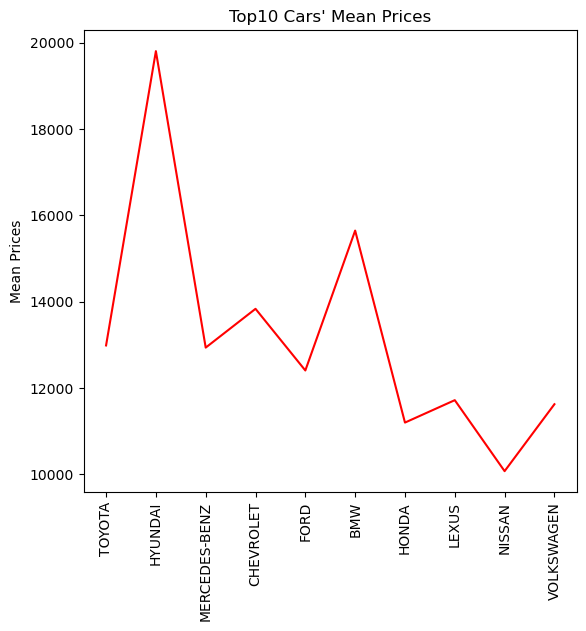

In [61]:
fig = plt.figure(figsize=(14,6))
ax2 = fig.add_subplot(122)
sns.lineplot(top10_cars.index,meanprice, color='r')
plt.xticks(rotation = 90)
plt.ylabel('Mean Prices')
plt.title("Top10 Cars' Mean Prices")
plt.show()

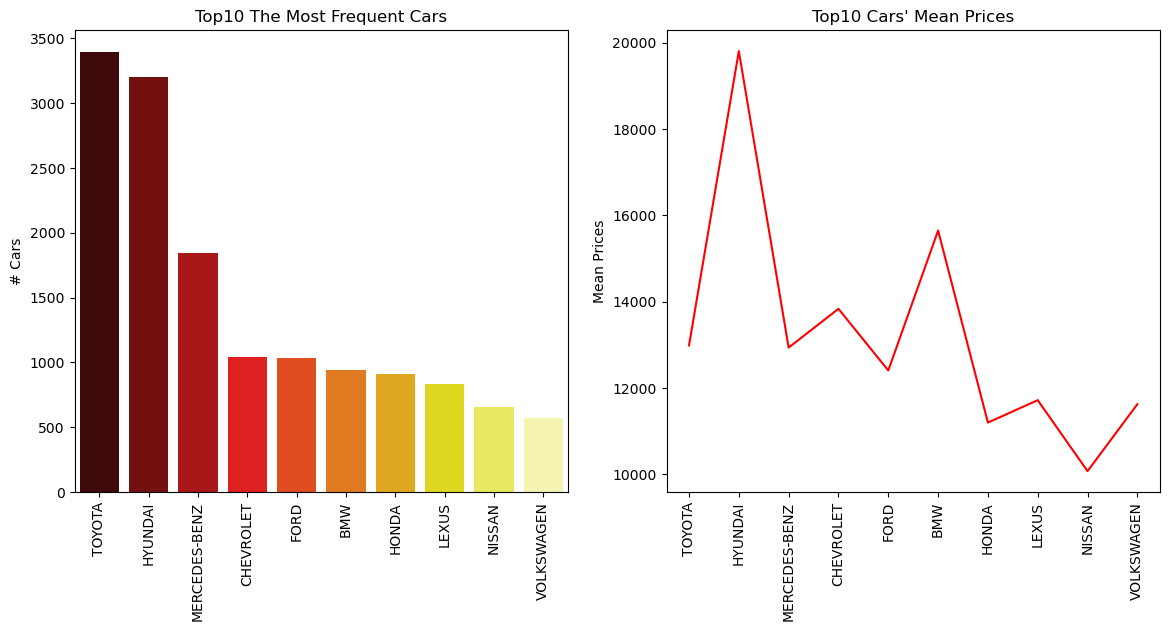

In [63]:
top10_mean_prices = [deleted_df[deleted_df['Manufacturer'] == i]['Price'].mean() for i in list(top10_cars.index)]

fig = plt.figure(figsize=(14,6))
ax = fig.add_subplot(121)
sns.barplot(top10_cars.index, top10_cars.values, palette='hot')
plt.xticks(rotation = 90)
plt.ylabel('# Cars')
plt.title('Top10 The Most Frequent Cars')

ax2 = fig.add_subplot(122)
sns.lineplot(top10_cars.index, top10_mean_prices, color='r')
plt.xticks(rotation = 90)
plt.ylabel('Mean Prices')
plt.title("Top10 Cars' Mean Prices")
plt.show()

In [64]:
df2=deleted_df.groupby('Doors')[['Levy']].sum()
df2

,Levy
Doors,
2,237607.0
4,10608300.0
5,31115.0


In [65]:
deleted_df.groupby('Doors')['Drive wheels'].value_counts()

Doors  Drive wheels
2      Rear              335
       Front             285
       4x4               103
4      Front           11528
       4x4              3440
       Rear             1723
5      Front              54
       Rear               30
       4x4                29
Name: Drive wheels, dtype: int64

In [66]:
type(deleted_df.groupby('Doors')['Drive wheels'].value_counts())

pandas.core.series.Series

In [67]:
deleted_df.groupby('Doors')['Drive wheels'].value_counts().shape

(9,)

In [68]:
deleted_df.groupby('Doors')['Drive wheels'].value_counts().index

MultiIndex([(2,  'Rear'),
            (2, 'Front'),
            (2,   '4x4'),
            (4, 'Front'),
            (4,   '4x4'),
            (4,  'Rear'),
            (5, 'Front'),
            (5,  'Rear'),
            (5,   '4x4')],
           names=['Doors', 'Drive wheels'])

In [69]:
deleted_df.groupby('Doors')['Drive wheels'].value_counts().values

array([  335,   285,   103, 11528,  3440,  1723,    54,    30,    29],
      dtype=int64)

In [70]:
dd_val = np.array(deleted_df.groupby('Doors')['Drive wheels'].value_counts().values).reshape(3,3)
dd_val

array([[  335,   285,   103],
       [11528,  3440,  1723],
       [   54,    30,    29]], dtype=int64)

In [71]:
dd_sum = dd_val.sum(axis=1).reshape(3,1)
dd_sum

array([[  723],
       [16691],
       [  113]], dtype=int64)

In [72]:
dd_sum = np.c_[dd_sum, dd_sum, dd_sum].flatten()
dd_sum 

array([  723,   723,   723, 16691, 16691, 16691,   113,   113,   113],
      dtype=int64)

In [73]:
(deleted_df.groupby('Doors')['Drive wheels'].value_counts() / dd_sum)*100

Doors  Drive wheels
2      Rear            46.334716
       Front           39.419087
       4x4             14.246196
4      Front           69.067162
       4x4             20.609910
       Rear            10.322929
5      Front           47.787611
       Rear            26.548673
       4x4             25.663717
Name: Drive wheels, dtype: float64

In [74]:
deleted_df.head(3)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,True,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,False
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,False,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,False
2,8467,NaN,HONDA,FIT,2006,Hatchback,False,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,False


In [75]:
deleted_df.groupby('Drive wheels')['Price'].mean().sort_values(ascending=False)

Drive wheels
Front    14700.483441
Rear     13662.755268
4x4      12958.593505
Name: Price, dtype: float64

In [76]:
deleted_df.groupby('Gear box type')['Price'].median().sort_values(ascending=False)

Gear box type
Tiptronic    17876.0
Variator     13172.0
Automatic    11563.0
Manual        8781.0
Name: Price, dtype: float64

In [77]:
deleted_df.groupby('Color')['Price'].mean().sort_values(ascending=False)

Color
Yellow           16165.645833
Grey             15511.388683
White            14855.971142
Brown            14810.414201
Carnelian red    14742.733728
Orange           14695.240506
Beige            14418.140625
Black            14270.543848
Sky blue         13961.554622
Silver           13956.965266
Golden           13623.264286
Blue             12751.590000
Red              12338.672078
Green             9117.311475
Pink              8967.560000
Purple            8837.384615
Name: Price, dtype: float64

In [78]:
deleted_df.groupby('Turbo')['Price'].median().sort_values(ascending=False)

Turbo
True     18189.0
False    11917.0
Name: Price, dtype: float64

In [79]:
deleted_df.groupby('Wheel')['Price'].median().sort_values(ascending=False)

Wheel
Left wheel          13485.0
Right-hand drive     8467.0
Name: Price, dtype: float64

In [80]:
deleted_df.groupby('Fuel type')['Price'].median().sort_values(ascending=False)

Fuel type
Plug-in Hybrid    22580.0
Hydrogen          20385.0
Diesel            18817.0
LPG               13485.0
Petrol            11917.0
Hybrid            10036.0
CNG                7527.0
Name: Price, dtype: float64

In [81]:
deleted_df['Fuel type'].value_counts()

Petrol            9362
Diesel            3596
Hybrid            3383
LPG                632
CNG                469
Plug-in Hybrid      84
Hydrogen             1
Name: Fuel type, dtype: int64

In [82]:
deleted_df.head(3)

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,True,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,False
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,False,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,False
2,8467,NaN,HONDA,FIT,2006,Hatchback,False,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,False


In [83]:
deleted_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 17527 entries, 0 to 19236
Data columns (total 18 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Price             17527 non-null  int64  
 1   Levy              12141 non-null  float64
 2   Manufacturer      17527 non-null  object 
 3   Model             17527 non-null  object 
 4   Prod. year        17527 non-null  int64  
 5   Category          17527 non-null  object 
 6   Leather interior  17527 non-null  bool   
 7   Fuel type         17527 non-null  object 
 8   Engine volume     17527 non-null  float64
 9   Mileage           17527 non-null  int64  
 10  Cylinders         17527 non-null  float64
 11  Gear box type     17527 non-null  object 
 12  Drive wheels      17527 non-null  object 
 13  Doors             17527 non-null  int64  
 14  Wheel             17527 non-null  object 
 15  Color             17527 non-null  object 
 16  Airbags           17527 non-null  int64 

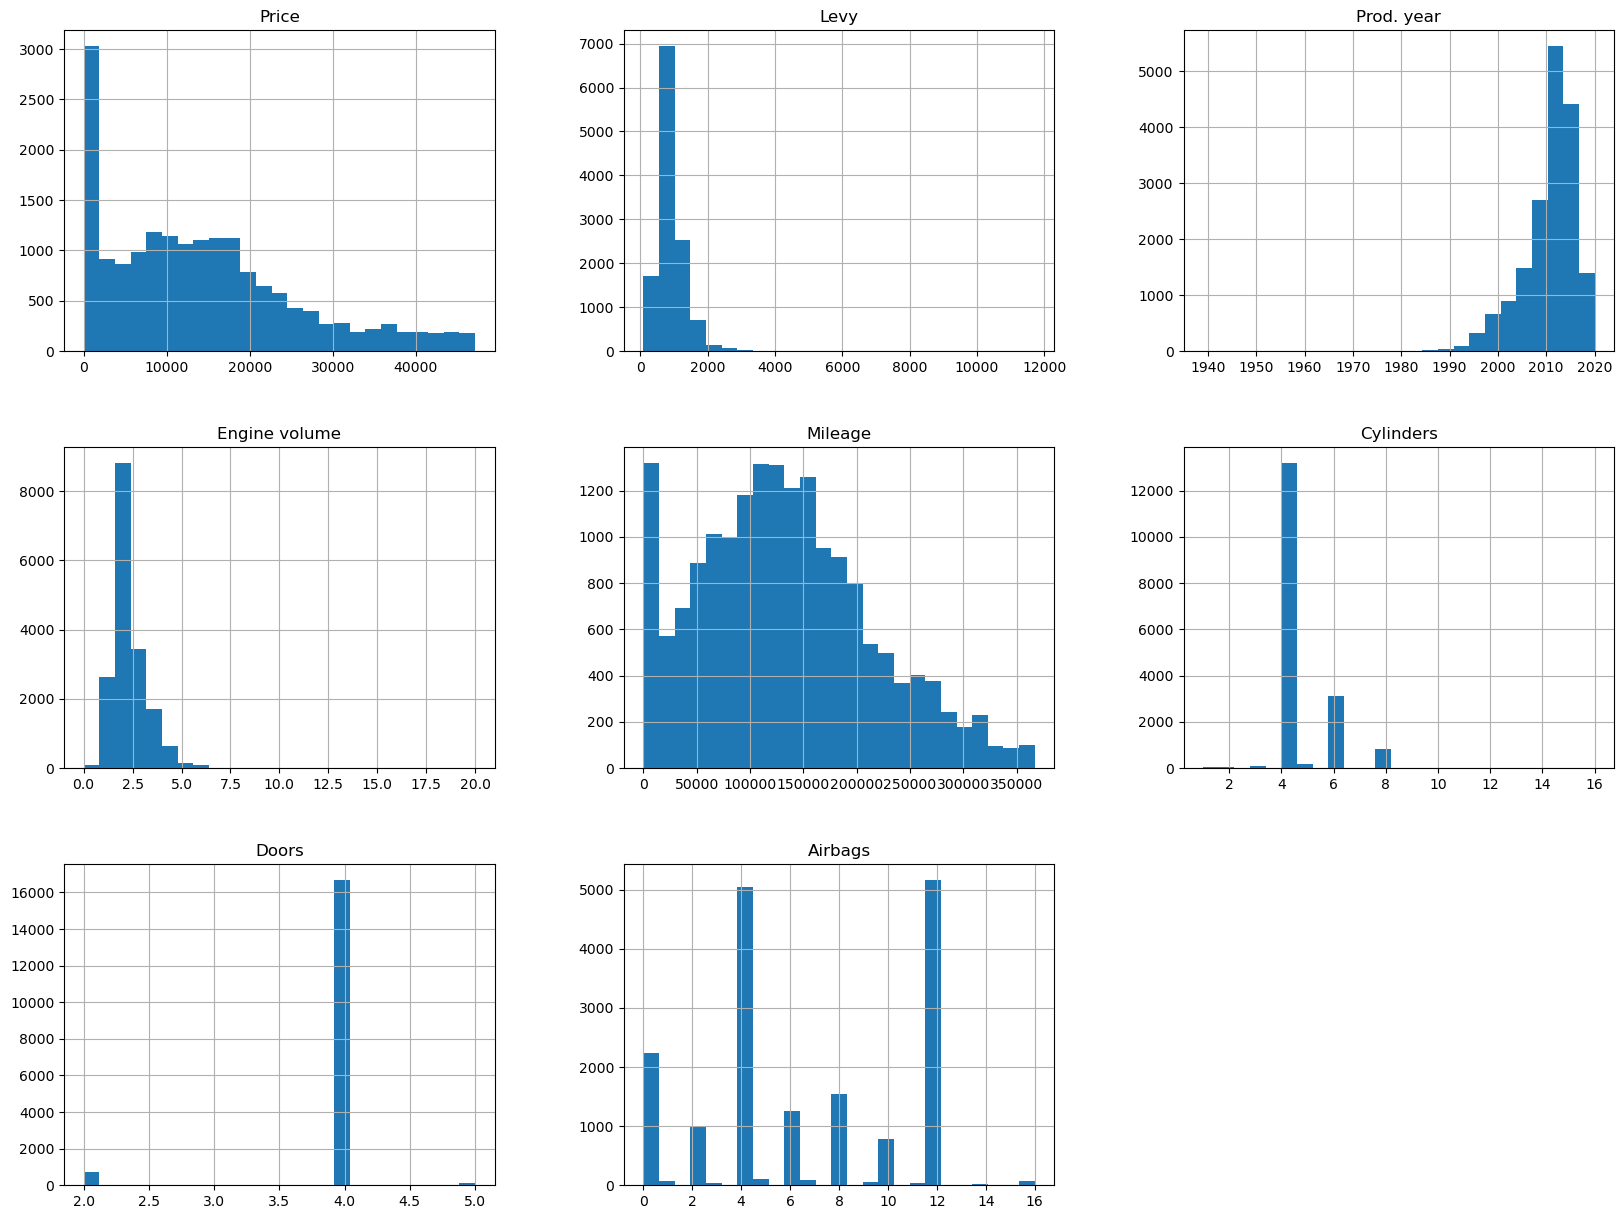

In [84]:
%matplotlib inline

deleted_df.hist(bins=25, figsize=(20,15))
plt.show()

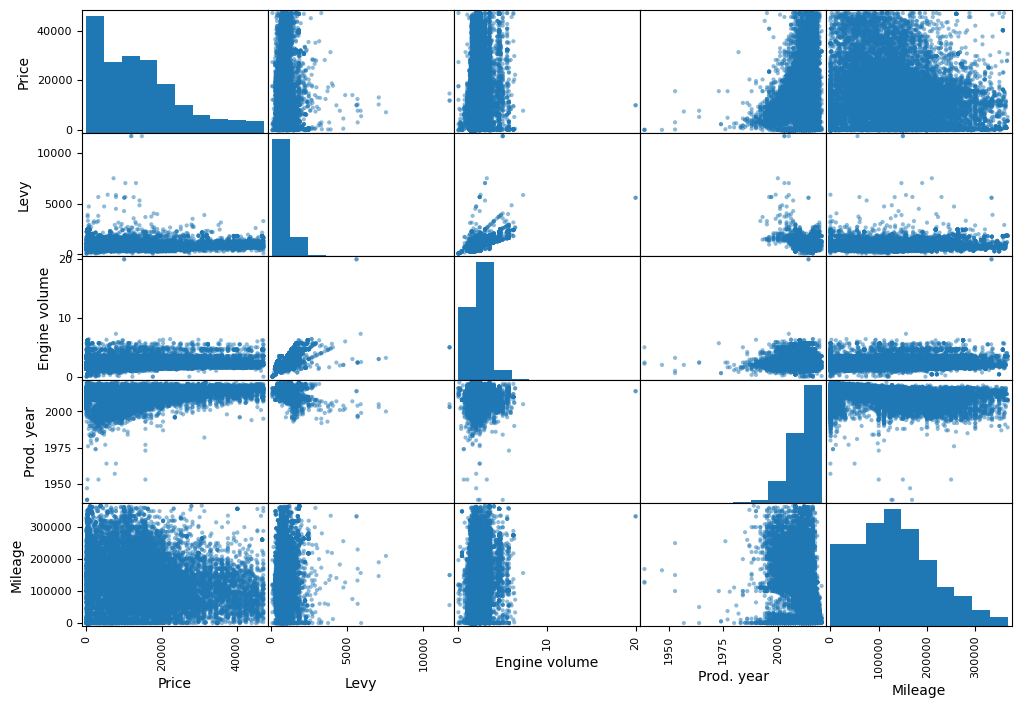

In [86]:
attributes = ['Price','Levy','Engine volume','Prod. year','Mileage']
scatter_matrix(deleted_df[attributes], figsize=(12,8))
plt.show()

There positive correlation between Engine volume and Levy and slightly negative correlation between Levy and Prod. year. Let's check the actual correlation scores between those attributes.

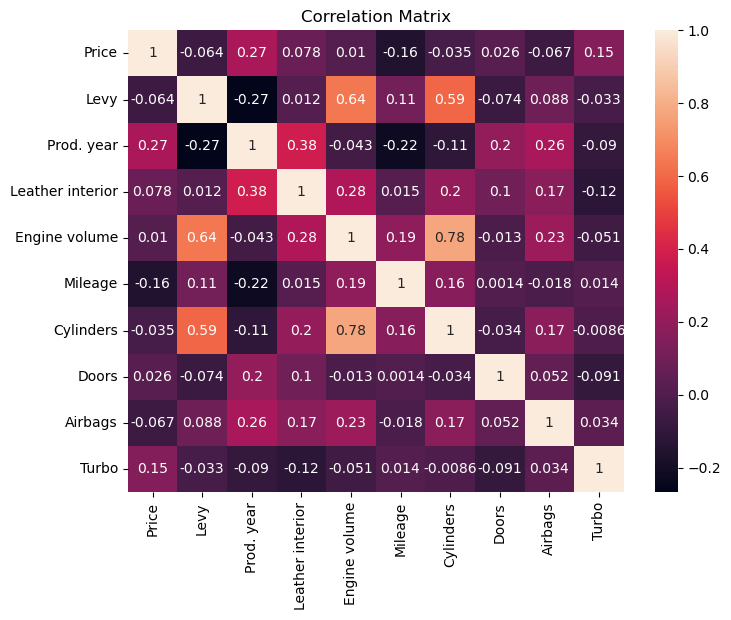

In [87]:
plt.figure(figsize=(8,6))
sns.heatmap(deleted_df.corr(),annot=True, cbar = True)
plt.title('Correlation Matrix')
plt.show()

The assumptions we made from scatter plot seems quite correct! The correliation between Levy and Engine volume 0.64 (not bad!). Engine volume and Cylinders has quite strong relationship which is 0.78 

In [85]:
num_attribs = ['Levy','Prod. year', 'Engine volume','Doors', 'Mileage', 'Cylinders', 'Airbags']
cat_attribs = ['Manufacturer','Category', 'Leather interior', 'Fuel type', 'Gear box type', 'Drive wheels', 'Wheel', 'Color', 'Turbo']

In [86]:
num_cars = deleted_df[num_attribs]
y = deleted_df['Price']
cat_cars = deleted_df[cat_attribs]

In [87]:
Imputer = SimpleImputer(strategy='median')

Imputer.fit(num_cars)
# Displaying medians of every numveric column we have
display(Imputer.statistics_)
num_cars = Imputer.transform(num_cars)

array([7.79000e+02, 2.01200e+03, 2.00000e+00, 4.00000e+00, 1.26265e+05,
       4.00000e+00, 6.00000e+00])

In [88]:
scaler = StandardScaler()
num_cars = scaler.fit_transform(num_cars)

In [89]:
num_cars

array([[ 1.37160845, -0.1217927 ,  1.41203665, ...,  0.65905288,
         1.24261819,  1.24708939],
       [ 0.40211876,  0.05745498,  0.83329684, ...,  0.73275   ,
         1.24261819,  0.32314571],
       [-0.20603881, -0.8387834 , -1.13441853, ...,  0.83109479,
        -0.47689618, -1.06276982],
       ...,
       [-0.06099705, -0.1217927 , -0.32418279, ..., -0.19703846,
        -0.47689618, -0.60079798],
       [ 1.0891587 , -0.65953572, -0.32418279, ..., -0.99740519,
        -0.47689618, -0.60079798],
       [-0.27219821,  0.23670266,  0.13880906, ...,  0.67033795,
        -0.47689618,  1.24708939]])

# Using Pipeline

In [90]:
num_pipeline = Pipeline([
    ('imputer', SimpleImputer(strategy='median')),
    ('std_scaler', StandardScaler())])

# Using Column Transformer

In [91]:
full_pipeline = ColumnTransformer([
    ('num',num_pipeline, num_attribs),
    ('cat',OneHotEncoder(), cat_attribs)  
])
cars_prepared = full_pipeline.fit_transform(deleted_df)

In [92]:
from sklearn import set_config
set_config(display='diagram')
display(full_pipeline)

ColumnTransformer(transformers=[('num',
                                 Pipeline(steps=[('imputer',
                                                  SimpleImputer(strategy='median')),
                                                 ('std_scaler',
                                                  StandardScaler())]),
                                 ['Levy', 'Prod. year', 'Engine volume',
                                  'Doors', 'Mileage', 'Cylinders', 'Airbags']),
                                ('cat', OneHotEncoder(),
                                 ['Manufacturer', 'Category',
                                  'Leather interior', 'Fuel type',
                                  'Gear box type', 'Drive wheels', 'Wheel',
                                  'Color', 'Turbo'])])

In [93]:
cars_prepared.shape

(17527, 114)

In [94]:
deleted_df.head()

,Price,Levy,Manufacturer,Model,Prod. year,Category,Leather interior,Fuel type,Engine volume,Mileage,Cylinders,Gear box type,Drive wheels,Doors,Wheel,Color,Airbags,Turbo
0,13328,1399.0,LEXUS,RX 450,2010,Jeep,True,Hybrid,3.5,186005,6.0,Automatic,4x4,4,Left wheel,Silver,12,False
1,16621,1018.0,CHEVROLET,Equinox,2011,Jeep,False,Petrol,3.0,192000,6.0,Tiptronic,4x4,4,Left wheel,Black,8,False
2,8467,NaN,HONDA,FIT,2006,Hatchback,False,Petrol,1.3,200000,4.0,Variator,Front,4,Right-hand drive,Black,2,False
3,3607,862.0,FORD,Escape,2011,Jeep,True,Hybrid,2.5,168966,4.0,Automatic,4x4,4,Left wheel,White,0,False
4,11726,446.0,HONDA,FIT,2014,Hatchback,True,Petrol,1.3,91901,4.0,Automatic,Front,4,Left wheel,Silver,4,False


In [95]:
ddf1 = pd.get_dummies(deleted_df[['Manufacturer','Model','Category','Fuel type','Gear box type','Drive wheels','Wheel','Color']])

print('Training Features shape: ', ddf1.shape)

Training Features shape:  (17527, 1589)


In [96]:
X_train, X_test, y_train, y_test = train_test_split(cars_prepared, y, test_size=0.33, random_state = 123)

# Model Setup, Hyperparameter Tuning and Model Evaluation

In [97]:
lin_reg = LinearRegression()

lin_reg.fit(X_train, y_train)

LinearRegression()

In [98]:
predictions = lin_reg.predict(X_train)
lin_mse = mean_squared_error(y_train, predictions)
lin_rmse = np.sqrt(lin_mse)
lin_rmse

9216.571396618881

In [99]:
mae = mean_absolute_error(y_train, predictions)
mae

7129.708581100996

In [100]:
tree_reg = DecisionTreeRegressor(random_state = 123)

tree_reg.fit(X_train, y_train)

DecisionTreeRegressor(random_state=123)

In [101]:
tree_predictions = tree_reg.predict(X_train)
tree_mse = mean_squared_error(y_train, tree_predictions)
tree_rmse = np.sqrt(tree_mse)
tree_rmse

995.1400359363548

In [102]:
scores = cross_val_score(tree_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)

tree_rmse_scores = np.sqrt(-scores)
tree_rmse_scores

array([7454.58364456, 7298.07276603, 7704.87808287, 7407.14703388,
       7713.85297711])

In [103]:
lin_scores = cross_val_score(lin_reg, X_train, y_train, scoring='neg_mean_squared_error', cv=5)
lin_rmse_scores = np.sqrt(-lin_scores)
lin_rmse_scores

array([8999.19919536, 9584.73404472, 9347.37624453, 9092.5865617 ,
       9528.08487925])

In [104]:
forest_reg = RandomForestRegressor(n_estimators = 100, random_state=123)

forest_reg.fit(X_train, y_train)

RandomForestRegressor(random_state=123)

In [105]:
forest_predictions = forest_reg.predict(X_train)
forest_mse = mean_squared_error(y_train, forest_predictions)
forest_rmse = np.sqrt(forest_mse)
forest_rmse

2297.021106042258

In [106]:
forest_scores = cross_val_score(forest_reg, X_train, y_train,
                                scoring="neg_mean_squared_error", cv=5)
forest_rmse_scores = np.sqrt(-forest_scores)
forest_rmse_scores

array([5780.25626157, 5684.29515446, 5546.55824399, 5652.49716654,
       6005.14956653])

In [107]:
feature_importance_values= forest_reg.feature_importances_
feature_importances = pd.DataFrame(feature_importance_values)

In [108]:
feature_importances

,0
0,0.078087
1,0.223581
2,0.083474
3,0.003778
4,0.116565
...,...
109,0.000454
110,0.007672
111,0.000263
112,0.009364


In [109]:
len(feature_importance_values)

114

In [110]:
X_train.shape

(11743, 114)

In [111]:
df_ob=deleted_df.select_dtypes('object')

In [112]:
iter=df_ob.columns

In [113]:
# Number of unique classes in each object column of train
for i in iter:
    print(i, df_ob[i].unique().size)

Manufacturer 60
Model 1486
Category 11
Fuel type 7
Gear box type 4
Drive wheels 3
Wheel 2
Color 16


In [114]:
param_grid = [
    {'n_estimators': [100, 200], 'max_features': [35,33,31]},
  ]

forest_reg = RandomForestRegressor(random_state=42)

grid_search = GridSearchCV(forest_reg, param_grid, cv=5,
                           scoring='neg_mean_squared_error',
                           return_train_score=True)
grid_search.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42),
             param_grid=[{'max_features': [35, 33, 31],
                          'n_estimators': [100, 200]}],
             return_train_score=True, scoring='neg_mean_squared_error')

In [115]:
grid_search.best_params_

{'max_features': 35, 'n_estimators': 200}

In [116]:
cvres = grid_search.cv_results_
cvres

{'mean_fit_time': array([12.8674449 , 26.17402182, 12.44881363, 25.26160836, 12.0676465 ,
        23.90371375]),
 'std_fit_time': array([0.10396609, 0.35171921, 0.07798148, 0.34780611, 0.11725445,
        0.30293435]),
 'mean_score_time': array([0.05079455, 0.09979997, 0.05487614, 0.09914179, 0.05166187,
        0.09912996]),
 'std_score_time': array([0.00223507, 0.00269859, 0.00571665, 0.00037305, 0.00270534,
        0.00165051]),
 'param_max_features': masked_array(data=[35, 35, 33, 33, 31, 31],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'param_n_estimators': masked_array(data=[100, 200, 100, 200, 100, 200],
              mask=[False, False, False, False, False, False],
        fill_value='?',
             dtype=object),
 'params': [{'max_features': 35, 'n_estimators': 100},
  {'max_features': 35, 'n_estimators': 200},
  {'max_features': 33, 'n_estimators': 100},
  {'max_features': 33, 'n_estimators': 200},
  {'

In [117]:
cvdf=pd.DataFrame(cvres)
cvdf

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_max_features,param_n_estimators,params,split0_test_score,split1_test_score,split2_test_score,...,mean_test_score,std_test_score,rank_test_score,split0_train_score,split1_train_score,split2_train_score,split3_train_score,split4_train_score,mean_train_score,std_train_score
0,12.867445,0.103966,0.050795,0.002235,35,100,"{'max_features': 35, 'n_estimators': 100}",-3.096679e+07,-3.184477e+07,-2.976736e+07,...,-3.141774e+07,1.723012e+06,4,-5.016629e+06,-5.236525e+06,-5.198066e+06,-5.202669e+06,-5.071674e+06,-5.145113e+06,85292.675968
1,26.174022,0.351719,0.099800,0.002699,35,200,"{'max_features': 35, 'n_estimators': 200}",-3.073449e+07,-3.145867e+07,-2.959573e+07,...,-3.124028e+07,1.666043e+06,1,-4.889166e+06,-5.130924e+06,-5.113063e+06,-5.123057e+06,-5.005621e+06,-5.052366e+06,93457.996117
2,12.448814,0.077981,0.054876,0.005717,33,100,"{'max_features': 33, 'n_estimators': 100}",-3.090362e+07,-3.163441e+07,-3.025465e+07,...,-3.143783e+07,1.496861e+06,5,-5.009394e+06,-5.220918e+06,-5.217110e+06,-5.254496e+06,-5.081035e+06,-5.156591e+06,94616.836041
3,25.261608,0.347806,0.099142,0.000373,33,200,"{'max_features': 33, 'n_estimators': 200}",-3.085403e+07,-3.148681e+07,-2.990922e+07,...,-3.129281e+07,1.505072e+06,2,-4.895738e+06,-5.124708e+06,-5.132844e+06,-5.120182e+06,-5.002711e+06,-5.055237e+06,93022.468128
4,12.067647,0.117254,0.051662,0.002705,31,100,"{'max_features': 31, 'n_estimators': 100}",-3.081837e+07,-3.149753e+07,-3.017001e+07,...,-3.145147e+07,1.662553e+06,6,-5.019609e+06,-5.193383e+06,-5.201272e+06,-5.243844e+06,-5.136770e+06,-5.158976e+06,77577.799130
5,23.903714,0.302934,0.099130,0.001651,31,200,"{'max_features': 31, 'n_estimators': 200}",-3.091863e+07,-3.159350e+07,-3.016173e+07,...,-3.139011e+07,1.520201e+06,3,-4.893799e+06,-5.102091e+06,-5.092818e+06,-5.118935e+06,-5.018896e+06,-5.045308e+06,83132.393835


In [118]:
for mean_score, params in zip(cvres["mean_test_score"], cvres["params"]):
    print(np.sqrt(-mean_score), params)

5605.153105055072 {'max_features': 35, 'n_estimators': 100}
5589.300388047561 {'max_features': 35, 'n_estimators': 200}
5606.944440610192 {'max_features': 33, 'n_estimators': 100}
5593.997639552287 {'max_features': 33, 'n_estimators': 200}
5608.1611045576665 {'max_features': 31, 'n_estimators': 100}
5602.688100289354 {'max_features': 31, 'n_estimators': 200}


In [119]:
grid_search.best_estimator_

RandomForestRegressor(max_features=35, n_estimators=200, random_state=42)

In [120]:
X_train.shape

(11743, 114)

In [121]:
feature_importances = grid_search.best_estimator_.feature_importances_
feature_importances

array([6.94724011e-02, 1.62228218e-01, 6.13769145e-02, 3.64006556e-03,
       1.14064473e-01, 1.95449865e-02, 1.06661236e-01, 6.82440121e-05,
       9.86699482e-06, 1.63289488e-03, 5.64336952e-03, 5.38303432e-05,
       1.94729309e-04, 4.42824602e-03, 3.81707074e-05, 1.63357086e-05,
       7.03156398e-04, 3.35482337e-05, 1.88029563e-04, 1.28510991e-04,
       2.93781821e-03, 3.36034780e-05, 6.58444758e-05, 1.76299413e-06,
       0.00000000e+00, 3.19957762e-03, 3.86064851e-04, 2.88057610e-02,
       3.35357942e-04, 3.90113847e-06, 1.03336655e-03, 2.35713826e-03,
       2.78370693e-03, 0.00000000e+00, 1.52880538e-04, 6.56262795e-03,
       1.66191264e-04, 4.07005783e-04, 7.36492158e-04, 7.31888124e-03,
       2.47032237e-05, 9.60733318e-05, 6.57045339e-04, 2.20217267e-05,
       1.83114336e-03, 4.40004725e-04, 1.93433925e-05, 0.00000000e+00,
       9.97284873e-04, 8.79709869e-05, 1.38198760e-05, 1.87512123e-06,
       1.27744119e-06, 0.00000000e+00, 2.29347488e-05, 6.19045277e-06,
      

In [122]:
pd.DataFrame(feature_importances)

,0
0,0.069472
1,0.162228
2,0.061377
3,0.003640
4,0.114064
...,...
109,0.000706
110,0.009868
111,0.000360
112,0.012418


In [123]:
cat_encoder = full_pipeline.named_transformers_["cat"]
cat_encoder

OneHotEncoder()

In [124]:
cat_encoder

OneHotEncoder()

In [125]:
cat_encoder.categories_

[array(['ACURA', 'ALFA ROMEO', 'AUDI', 'BMW', 'BUICK', 'CADILLAC',
        'CHEVROLET', 'CHRYSLER', 'CITROEN', 'DAEWOO', 'DAIHATSU', 'DODGE',
        'FIAT', 'FORD', 'GAZ', 'GMC', 'GREATWALL', 'HAVAL', 'HONDA',
        'HUMMER', 'HYUNDAI', 'INFINITI', 'ISUZU', 'JAGUAR', 'JEEP', 'KIA',
        'LANCIA', 'LAND ROVER', 'LEXUS', 'LINCOLN', 'MASERATI', 'MAZDA',
        'MERCEDES-BENZ', 'MERCURY', 'MINI', 'MITSUBISHI', 'MOSKVICH',
        'NISSAN', 'OPEL', 'PEUGEOT', 'PONTIAC', 'PORSCHE', 'RENAULT',
        'ROLLS-ROYCE', 'ROVER', 'SAAB', 'SATURN', 'SCION', 'SEAT', 'SKODA',
        'SSANGYONG', 'SUBARU', 'SUZUKI', 'TOYOTA', 'UAZ', 'VAZ',
        'VOLKSWAGEN', 'VOLVO', 'ZAZ', 'სხვა'], dtype=object),
 array(['Cabriolet', 'Coupe', 'Goods wagon', 'Hatchback', 'Jeep',
        'Limousine', 'Microbus', 'Minivan', 'Pickup', 'Sedan', 'Universal'],
       dtype=object),
 array([False,  True]),
 array(['CNG', 'Diesel', 'Hybrid', 'Hydrogen', 'LPG', 'Petrol',
        'Plug-in Hybrid'], dtype=object),
 ar

In [128]:
cat_one_hot_attribs = [i  for cat in cat_encoder.categories_ for i in cat]
cat_one_hot_attribs 

['ACURA',
 'ALFA ROMEO',
 'AUDI',
 'BMW',
 'BUICK',
 'CADILLAC',
 'CHEVROLET',
 'CHRYSLER',
 'CITROEN',
 'DAEWOO',
 'DAIHATSU',
 'DODGE',
 'FIAT',
 'FORD',
 'GAZ',
 'GMC',
 'GREATWALL',
 'HAVAL',
 'HONDA',
 'HUMMER',
 'HYUNDAI',
 'INFINITI',
 'ISUZU',
 'JAGUAR',
 'JEEP',
 'KIA',
 'LANCIA',
 'LAND ROVER',
 'LEXUS',
 'LINCOLN',
 'MASERATI',
 'MAZDA',
 'MERCEDES-BENZ',
 'MERCURY',
 'MINI',
 'MITSUBISHI',
 'MOSKVICH',
 'NISSAN',
 'OPEL',
 'PEUGEOT',
 'PONTIAC',
 'PORSCHE',
 'RENAULT',
 'ROLLS-ROYCE',
 'ROVER',
 'SAAB',
 'SATURN',
 'SCION',
 'SEAT',
 'SKODA',
 'SSANGYONG',
 'SUBARU',
 'SUZUKI',
 'TOYOTA',
 'UAZ',
 'VAZ',
 'VOLKSWAGEN',
 'VOLVO',
 'ZAZ',
 'სხვა',
 'Cabriolet',
 'Coupe',
 'Goods wagon',
 'Hatchback',
 'Jeep',
 'Limousine',
 'Microbus',
 'Minivan',
 'Pickup',
 'Sedan',
 'Universal',
 False,
 True,
 'CNG',
 'Diesel',
 'Hybrid',
 'Hydrogen',
 'LPG',
 'Petrol',
 'Plug-in Hybrid',
 'Automatic',
 'Manual',
 'Tiptronic',
 'Variator',
 '4x4',
 'Front',
 'Rear',
 'Left wheel',
 'Right

In [129]:
pd.DataFrame(cat_one_hot_attribs )

,0
0,ACURA
1,ALFA ROMEO
2,AUDI
3,BMW
4,BUICK
...,...
102,Sky blue
103,White
104,Yellow
105,False


In [130]:
attributes = num_attribs +  cat_one_hot_attribs
attributes

['Levy',
 'Prod. year',
 'Engine volume',
 'Doors',
 'Mileage',
 'Cylinders',
 'Airbags',
 'ACURA',
 'ALFA ROMEO',
 'AUDI',
 'BMW',
 'BUICK',
 'CADILLAC',
 'CHEVROLET',
 'CHRYSLER',
 'CITROEN',
 'DAEWOO',
 'DAIHATSU',
 'DODGE',
 'FIAT',
 'FORD',
 'GAZ',
 'GMC',
 'GREATWALL',
 'HAVAL',
 'HONDA',
 'HUMMER',
 'HYUNDAI',
 'INFINITI',
 'ISUZU',
 'JAGUAR',
 'JEEP',
 'KIA',
 'LANCIA',
 'LAND ROVER',
 'LEXUS',
 'LINCOLN',
 'MASERATI',
 'MAZDA',
 'MERCEDES-BENZ',
 'MERCURY',
 'MINI',
 'MITSUBISHI',
 'MOSKVICH',
 'NISSAN',
 'OPEL',
 'PEUGEOT',
 'PONTIAC',
 'PORSCHE',
 'RENAULT',
 'ROLLS-ROYCE',
 'ROVER',
 'SAAB',
 'SATURN',
 'SCION',
 'SEAT',
 'SKODA',
 'SSANGYONG',
 'SUBARU',
 'SUZUKI',
 'TOYOTA',
 'UAZ',
 'VAZ',
 'VOLKSWAGEN',
 'VOLVO',
 'ZAZ',
 'სხვა',
 'Cabriolet',
 'Coupe',
 'Goods wagon',
 'Hatchback',
 'Jeep',
 'Limousine',
 'Microbus',
 'Minivan',
 'Pickup',
 'Sedan',
 'Universal',
 False,
 True,
 'CNG',
 'Diesel',
 'Hybrid',
 'Hydrogen',
 'LPG',
 'Petrol',
 'Plug-in Hybrid',
 'Automatic

In [131]:
pd.DataFrame(attributes)

,0
0,Levy
1,Prod. year
2,Engine volume
3,Doors
4,Mileage
...,...
109,Sky blue
110,White
111,Yellow
112,False


In [132]:
sorted(zip(feature_importances, attributes), reverse=True)

[(0.16222821803285245, 'Prod. year'),
 (0.11406447328306066, 'Mileage'),
 (0.10666123617296097, 'Airbags'),
 (0.06947240110283213, 'Levy'),
 (0.061376914505837266, 'Engine volume'),
 (0.060392968321859065, 'Diesel'),
 (0.036292755395727495, 'Tiptronic'),
 (0.02880576099864349, 'HYUNDAI'),
 (0.02447151552525159, 'Automatic'),
 (0.023294992090805034, 'SSANGYONG'),
 (0.019544986498590513, 'Cylinders'),
 (0.019094152758166442, 'Sedan'),
 (0.01711112825196807, 'Jeep'),
 (0.015229080814674518, False),
 (0.01482844293802825, True),
 (0.014237762684945338, 'Front'),
 (0.012764262163777015, True),
 (0.012632612830036057, 'TOYOTA'),
 (0.012417781667569999, False),
 (0.010904544507763732, 'Black'),
 (0.009867545588716014, 'White'),
 (0.009764591684842349, 'Petrol'),
 (0.008982433760085267, 'Silver'),
 (0.008916379884388545, 'Hybrid'),
 (0.008767703396986662, '4x4'),
 (0.007318881237987121, 'MERCEDES-BENZ'),
 (0.007172241463251212, 'Grey'),
 (0.0065626279453928765, 'LEXUS'),
 (0.005887059508549772

In [133]:
final_model = grid_search.best_estimator_
final_predictions = final_model.predict(X_test)
final_mse = mean_squared_error(y_test, final_predictions)
final_rmse = np.sqrt(final_mse)
final_rmse

5761.036495090154

In [134]:
confidence = 0.95
squared_errors = (final_predictions - y_test) ** 2
np.sqrt(stats.t.interval(confidence, len(squared_errors) - 1,
                         loc=squared_errors.mean(),
                         scale=stats.sem(squared_errors)))

array([5506.64790839, 6004.65750968])

In [135]:
# Save the model we trained
joblib.dump(final_model, "final_model.pkl")

# If you want to use this model all you need to do is:
# joblib.load('final_model.pkl')

['final_model.pkl']